First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Model Evaluation:
R² Score: 0.906
Mean Squared Error: 2.908


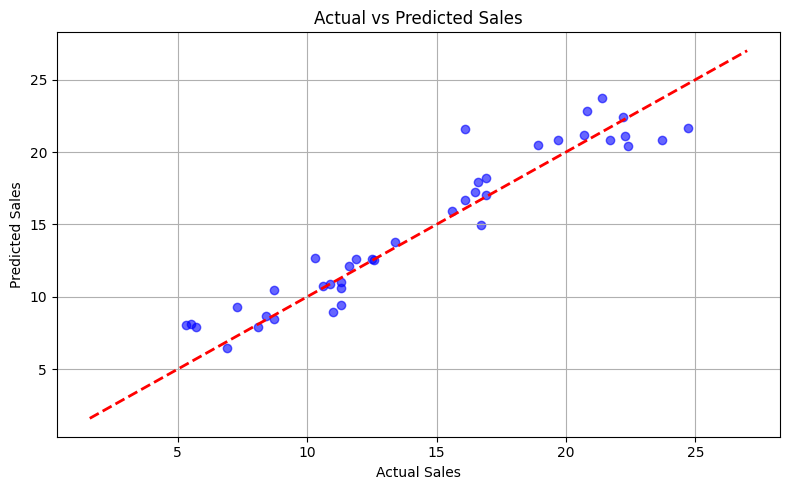

In [14]:
# SALES PREDICTION TASK
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('advertising.csv') 

# Display data
print("First 5 rows of the dataset:")
print(df.head())

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']                      

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluating mean square
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nModel Evaluation:\nR² Score: {r2:.3f}\nMean Squared Error: {mse:.3f}")

# Plot actual vs predicted sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


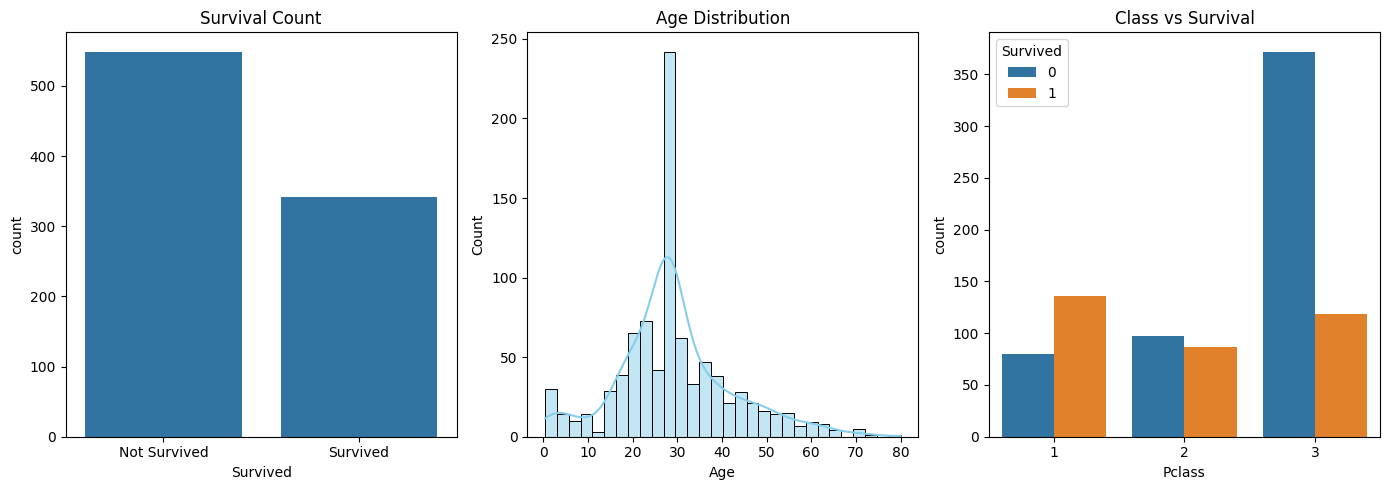

✅ Accuracy Score: 0.8212290502793296

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



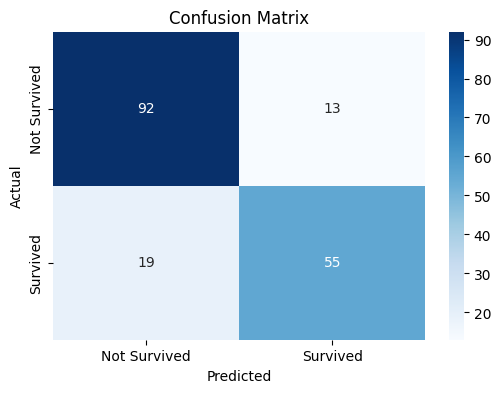

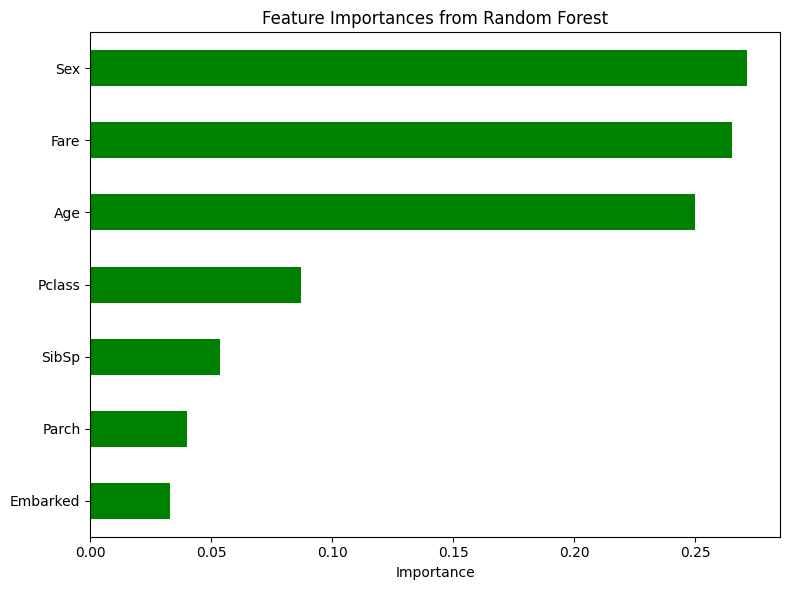

In [13]:
# Titanic Survival Prediction with Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# data
df = pd.read_csv('Titanic-Dataset.csv')

#Drop columns not useful
drop_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId']
for col in drop_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

#Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Visualize data distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Class vs Survival')

plt.tight_layout()
plt.show()

# Split the dataset
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Feature Importance
plt.figure(figsize=(8, 6))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='green')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


R² Score: 0.2166
RMSE: 1.1841


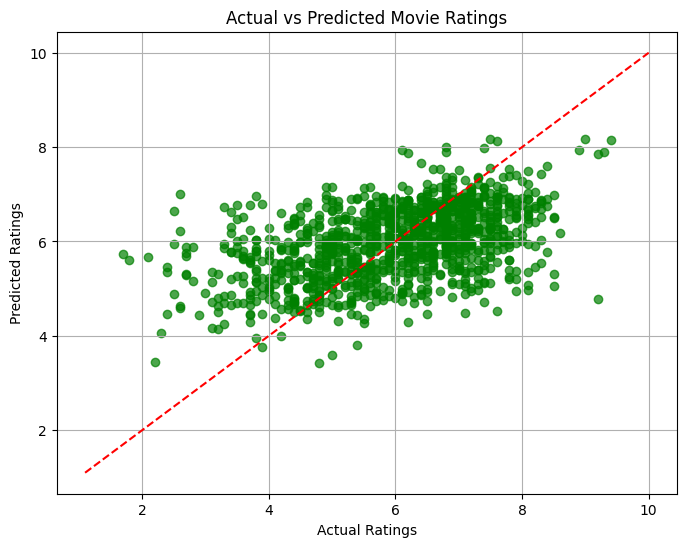

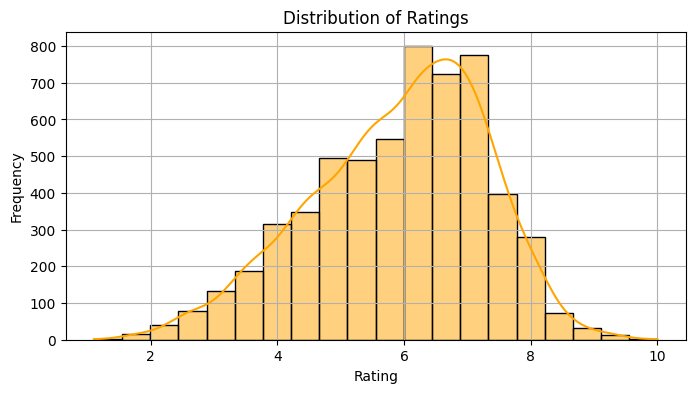

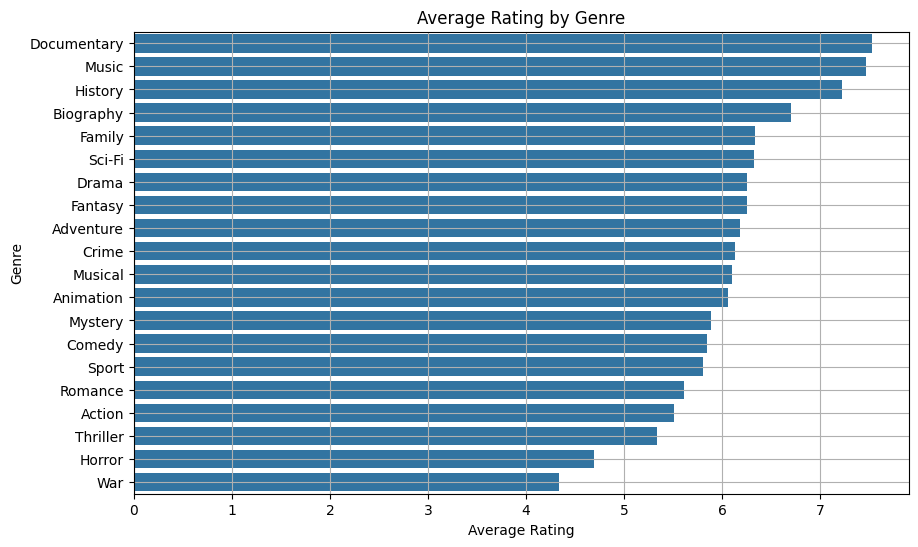

In [11]:
#Movie Rating
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Data
df = pd.read_csv('IMDb Movies India.csv')

# Missing values
df = df.dropna(subset=['Rating', 'Genre', 'Director', 'Actor 1', 'Year', 'Duration'])

df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Extract numeric runtime from 'Duration' (e.g., '109 min' -> 109)
df['Runtime'] = df['Duration'].str.extract(r'(\d+)')[0].astype(float)


df.rename(columns={'Actor 1': 'Actor1'}, inplace=True)

# Prepare dataset
data = df[['Genre', 'Director', 'Actor1', 'Year', 'Runtime', 'Rating']].copy()

X = data.drop('Rating', axis=1)
y = data['Rating']
categorical_features = ['Genre', 'Director', 'Actor1']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

#  Visualizations
# Actual vs Predicted Ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()

# Rating Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['Rating'], bins=20, kde=True, color='orange')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Average Rating by Genre
plt.figure(figsize=(10, 6))
genre_rating = data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=genre_rating.values, y=genre_rating.index)
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.grid(True)
plt.show()
